In [1]:
%matplotlib inline



# Delaunay Triangulation

This example demonstrates how to calculate the [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation) of an input graph. We start by generating a set of points on a 2D grid using random ``numpy`` arrays and a graph with those vertex coordinates and no edges.


In [2]:
import numpy as np
from scipy.spatial import Delaunay
import igraph as ig
import matplotlib.pyplot as plt

We start by generating a random graph in the 2D unit cube, fixing the random
seed to ensure reproducibility.



In [3]:
np.random.seed(0)
x, y = np.random.rand(2, 30)
g = ig.Graph(30)
g.vs['x'] = x
g.vs['y'] = y

Because we already set the `x` and `y` vertex attributes, we can use
:meth:`igraph.Graph.layout_auto` to wrap them into a :class:`igraph.Layout`
object.



In [4]:
layout = g.layout_auto()

Now we can calculate the delaunay triangulation using `scipy`'s :class:`scipy:scipy.spatial.Delaunay` class:



In [5]:
delaunay = Delaunay(layout.coords)

Given the triangulation, we can add the edges into the original graph:



In [6]:
for tri in delaunay.simplices:
    g.add_edges([
        (tri[0], tri[1]),
        (tri[1], tri[2]),
        (tri[0], tri[2]),
    ])

Because adjacent triangles share an edge/side, the graph now contains some
edges more than once. It's useful to simplify the graph to get rid of those
multiedges, keeping each side only once:



In [7]:
g.simplify()

Finally, plotting the graph gives a good idea of what the triangulation looks
like:



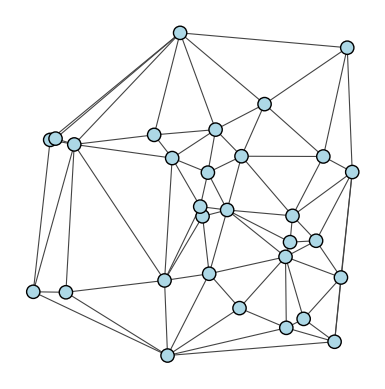

In [8]:
fig, ax = plt.subplots()
ig.plot(
    g,
    layout=layout,
    target=ax,
    vertex_size=0.04,
    vertex_color="lightblue",
    edge_width=0.8
)
plt.show()

## Alternative plotting style
We can use :doc:`matplotlib <matplotlib:index>` to plot the faces of the
triangles instead of the edges. First, we create a hue gradient for the
triangle faces:



In [9]:
palette = ig.GradientPalette("midnightblue", "lightblue", 100)

Then we can "plot" the triangles using
:class:`matplotlib:matplotlib.patches.Polygon` and the graph using
:func:`igraph.plot() <igraph.drawing.plot>`:



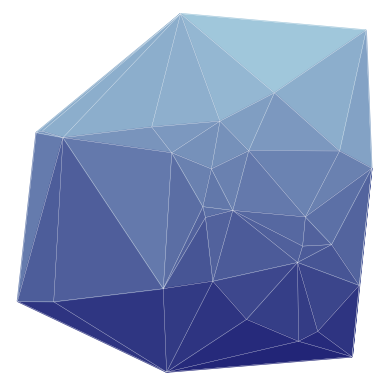

In [10]:
fig, ax = plt.subplots()
for tri in delaunay.simplices:
    # get the points of the triangle
    tri_points = [delaunay.points[tri[i]] for i in range(3)]

    # calculate the vertical center of the triangle
    center = (tri_points[0][1] + tri_points[1][1] + tri_points[2][1]) / 3

    # draw triangle onto axes
    poly = plt.Polygon(tri_points, color=palette.get(int(center * 100)))
    ax.add_patch(poly)

ig.plot(
    g,
    layout=layout,
    target=ax,
    vertex_size=0.0,
    edge_width=0.2,
    edge_color="white",
)
ax.set(xlim=(0, 1), ylim=(0, 1))
plt.show()